# Feature Engineering

## 1.환경준비

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic 

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.

In [10]:
# air quality 
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.shape

(153, 5)

In [3]:
# student
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/student-por2.csv'
student = pd.read_csv(path)
student.shape

(649, 26)

In [4]:
# 보스톤 집값 데이터
boston = pd.read_csv('https://bit.ly/3EuWvZw')
boston.head()

,crim,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,zn2
0,0.00632,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


## 2.Feature Engineering

### (1) 날짜로 부터 날짜 요소 추출하기

In [5]:
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


In [11]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Date     153 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 6.1+ KB


* 날짜 데이터로 변환하기 : to_datetime
    * format : 기존 날짜 정보가 어떤 형식인지 컴퓨터에게 알려주기  https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [12]:
air['Date'] = pd.to_datetime(air['Date'], format= '%Y-%m-%d') # farmat : 원래 데이터가 어떤 형식이었는지 알려주는 코드. 
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Ozone    153 non-null    int64         
 1   Solar.R  146 non-null    float64       
 2   Wind     153 non-null    float64       
 3   Temp     153 non-null    int64         
 4   Date     153 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 6.1 KB


* 날짜 요소 뽑기

In [14]:
# 요일 숫자 : 0 - 월, 6 - 일
air['Date'].dt.dayofweek

0      1
1      2
2      3
3      4
4      5
      ..
148    2
149    3
150    4
151    5
152    6
Name: Date, Length: 153, dtype: int64

In [15]:
# 요일 이름
air['Date'].dt.day_name()

0        Tuesday
1      Wednesday
2       Thursday
3         Friday
4       Saturday
         ...    
148    Wednesday
149     Thursday
150       Friday
151     Saturday
152       Sunday
Name: Date, Length: 153, dtype: object

In [19]:
# 요일 이름 3자리
air['Date'].dt.day_name().str.slice(0,3)
air['Date'].dt.day_name().str[0:3]

0      Tue
1      Wed
2      Thu
3      Fri
4      Sat
      ... 
148    Wed
149    Thu
150    Fri
151    Sat
152    Sun
Name: Date, Length: 153, dtype: object

In [20]:
# 연도
air['Date'].dt.year

0      1973
1      1973
2      1973
3      1973
4      1973
       ... 
148    1973
149    1973
150    1973
151    1973
152    1973
Name: Date, Length: 153, dtype: int64

In [21]:
# 주차(week)
air['Date'].dt.week

<ipython-input-21-88252c5817e1>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  air['Date'].dt.week


0      18
1      18
2      18
3      18
4      18
       ..
148    39
149    39
150    39
151    39
152    39
Name: Date, Length: 153, dtype: int64

### (2) 숫자를 범주로 변환하기

* 숫자를 범주로 변환하는 목적
    * 숫자로써의 의미 : 5과 10의 비교 : 10은 5의 2배
    * 범주로써의 의미 : 그룹 내에서는 공통된 특성이지만, 그룹 간에는 특성에 차이가 있다는 의미.

#### 보스톤 교사당 학생수(ptratio)를 범주로 변환하기

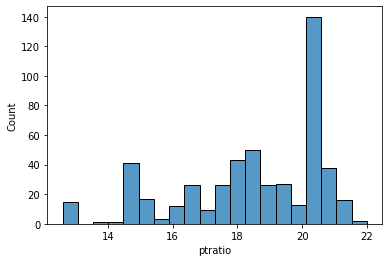

In [22]:
sns.histplot(x = 'ptratio', data = boston, bins = 20)
plt.show()

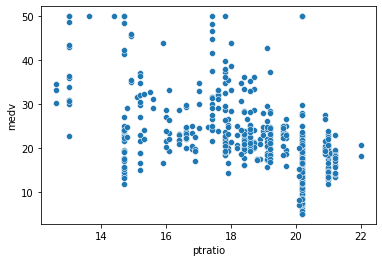

In [23]:
sns.scatterplot(x = 'ptratio', y = 'medv', data = boston) # 교사 한명당 학생수와 집값의 상관관계
plt.show()

* 숫자를 범주로 만들기

In [25]:
boston['ptratio_g'] = pd.cut(boston['ptratio'], bins = [0,14,20,30], labels = ['L','M','H'])

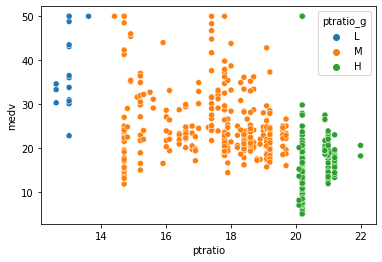

In [28]:
sns.scatterplot(x = 'ptratio', y = 'medv', data = boston, hue = 'ptratio_g') # 교사 한명당 학생수와 집값의 상관관계
plt.show()

* 숫자에 대한 분석
    * 상관분석

In [26]:
spst.pearsonr(boston['ptratio'], boston['medv'])

(-0.507786685537562, 1.609509478472518e-34)

* 범주에 대한 분석
    * 분산분석

In [27]:
L = boston.loc[boston['ptratio_g']=='L', 'medv']
M = boston.loc[boston['ptratio_g']=='M', 'medv']
H = boston.loc[boston['ptratio_g']=='H', 'medv']

spst.f_oneway(L, M, H)

F_onewayResult(statistic=106.35920595953505, pvalue=2.997005581712739e-39)

* [추가]모델로 만들고 비교
    * 아래 코드는 아직 배우지 않았습니다.
    * 실행해서 어떤 모델이 좀더 나은 모델인지 비교하는 용도로만 이해하세요.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

target = 'medv'
x1 = boston.loc[:, ['ptratio']]
x2 = boston.loc[:, ['ptratio_g']]
y = boston.loc[:, target]

x2 = pd.get_dummies(x2, columns = ['ptratio_g'], drop_first = True)

x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y, test_size = .3, random_state = 2022)
x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y, test_size = .3, random_state = 2022)

m1 = LinearRegression().fit(x1_train, y1_train)
m2 = LinearRegression().fit(x2_train, y2_train)

p1 = m1.predict(x1_val)
p2 = m2.predict(x2_val)

print(mean_absolute_error(y1_val, p1), mean_absolute_percentage_error(y1_val, p1))
print(mean_absolute_error(y2_val, p2), mean_absolute_percentage_error(y2_val, p2))

# 범주로 나눴을때의 오차가 더 적음. 

6.117069282243945 0.3936662503977873
5.770825868252547 0.3582226439949706


### (3) 범주형 변수 두개를 하나의 범주로 결합
* (아래 내용은 범주 vs 범주를 배운 후에 실행해 봅니다.)
* 범주형 변수 두개를 하나로 결합하는 목적
    * 각 범주형 변수와 Target 간에 특별한 관계가 없지만
    * 결합시 Target과 보다 강한 관계를 나타낼 수 있음. 

#### 학업성취도 데이터에서 성별 + 아빠와 동거 여부 결합해보기


In [30]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,activities,internet,famrel,freetime,goout,Dalc,Walc,health,absences,G31
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,no,yes,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,unknown,other,...,no,yes,4,3,2,2,3,3,6,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


* 몇개의 범주형 feature에 대해 학업성취도 G31과 관련이 있는지 카이제곱 검정을 수행해 봅니다.

In [ ]:
cols = ['school', 'sex', 'address', 'Pstatus', 'Medu', 'Fedu']
for v in cols :
    table = pd.crosstab(student['G31'], student[v])   
    result = spst.chi2_contingency(table)
    print(v, ':', result[1])


* 위 결과로 부터 가장 관련이 적은 두개의 변수를 살펴봅니다. 

In [ ]:
# 성별과 학업성취도
mosaic(student, [ 'sex','G31'])
plt.axhline(1- student['G31'].mean(), color = 'r')
plt.show()

In [ ]:
# 아빠와 동거 여부와 학업성취도
mosaic(student, [ 'Pstatus','G31'])
plt.axhline(1- student['G31'].mean(), color = 'r')
plt.show()

* 이제 두 변수를 결합해 보겠습니다.

In [ ]:
student['S_P'] = student['sex'] + '_' + student['Pstatus']

In [ ]:
v = 'S_P'
table = pd.crosstab(student['G31'], student[v])   
result = spst.chi2_contingency(table)
print(v, ' : ', result[1])

In [ ]:
pd.crosstab(student['G31'], student['sex'], normalize='columns')  

In [ ]:
pd.crosstab(student['G31'], student['S_P'], normalize='columns')   

In [ ]:
mosaic(student, [ 'S_P','G31'])
plt.axhline(1- student['G31'].mean(), color = 'r')
plt.show()